The Dataset and potential questions:
# Dataset: 
 Amazon Top 50 Best Selling Books 2009-2019

# Questions:
 1) What are the genre trends in the Top 50 books over time?
 
 2) How does the quantity of review reflect the User Rating of a Top 50 book?
 
 3) How does the book price impact its ratings?
 
 4) Does price impact the number of reviews given?
 
 5) How many authors had more than 1 book in Top 50 over the last few years?
 
 6) Which authors have appeared in the Top 50 list the most over the last few years?
 
 7) Do authors have correlation with review count in the Top 50 list?
  
 8) Do authors have correlation with price in the Top 50 list?
 


# Data Source:
https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

***Citation:***

Sooter Saalu, “Amazon Top 50 Bestselling Books 2009 - 2019.” Kaggle, 2020, doi: 10.34740/KAGGLE/DSV/1556647.

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import json
import numpy as np
import pandas as pd
from pandas.plotting import table
import ppscore as pps
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
# Set the style to "darkgrid"
sns.set_style('darkgrid')
sns.set_palette(["#39A7D0","#36ADA4"])


In [2]:
# Define path for data
path = r'data/bestselling_books_with_categories.csv'
# Read the data into dataframe
books = pd.read_csv(path)
print("Shape of the data ",books.shape,'\n')
print("Information on database",books.info(),'\n')
books.head()

Shape of the data  (550, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
Information on database None 



,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
# look at the data for missing values
books.isnull().sum()
# there are no missing values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [4]:
# look at range of values in User Rating field
books['User Rating'].describe()


count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

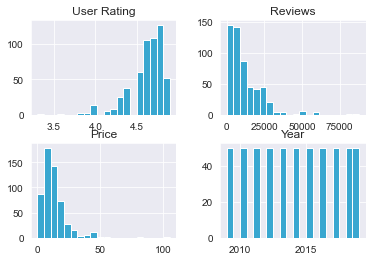

In [5]:
# View Summary Plot for all Features
books.hist(bins=20)
plt.show()
# We can see early on that all features have non normal data

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least

<AxesSubplot:xlabel='x', ylabel='y'>

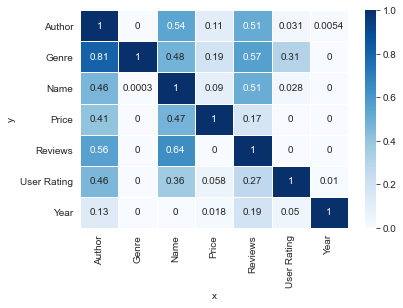

In [6]:
# Look at any relationships within the data
#pps.score(books, "feature_column", "target_column")

matrix_df = pps.matrix(books)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In the summary plot of correlation above,
it appears that the only strong correlation is Genre and Author

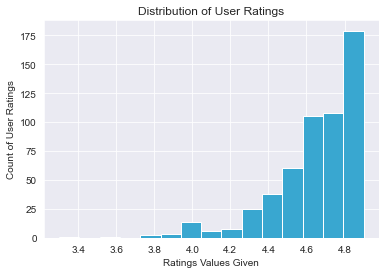

In [7]:
# Look at shape of User Rating values
# User ratings skewed toward upper end (5) because these are top selected, not normal data
fig, ax = plt.subplots()
ax.hist(books['User Rating'],bins=15)
ax.set_xlabel('Ratings Values Given')
ax.set_ylabel('Count of User Ratings')
ax.set_title('Distribution of User Ratings')
plt.show()

In [8]:
# look at range of values in Reviews field
books['Reviews'].describe()
# large standard deviation, counts of reviews varies greatly

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64

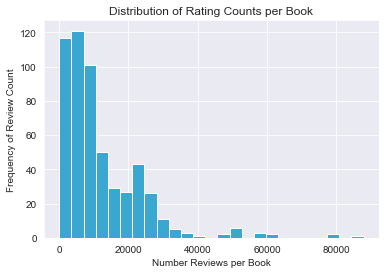

In [9]:
# Look at shape of Review Counts
# User ratings skewed toward lower end, not normal
fig, ax = plt.subplots()
ax.hist(books['Reviews'],bins=25)
ax.set_xlabel('Number Reviews per Book')
ax.set_ylabel('Frequency of Review Count')
ax.set_title('Distribution of Rating Counts per Book')
plt.show()

In [10]:
# look at range of values in Price field
books['Price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

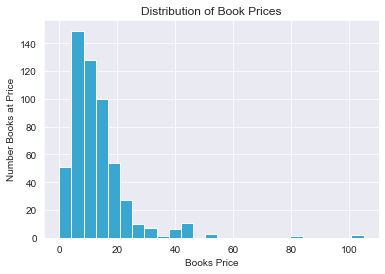

In [11]:
# Look at shape of Book Prices
# Prices skewed toward lower end, not normal
fig, ax = plt.subplots()
ax.hist(books['Price'],bins=25)
ax.set_xlabel('Books Price')
ax.set_ylabel('Number Books at Price')
ax.set_title('Distribution of Book Prices')
plt.show()

In [12]:
# look at range of values in Year field
books['Year'].value_counts()
# There are 50 books for each year

2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: Year, dtype: int64

In [13]:
# look at range of values in Genre field
books['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [14]:
books.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [15]:
books = pd.get_dummies(books, columns=['Genre'])
books.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre_Fiction,Genre_Non Fiction
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,0,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,1,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,0,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,1,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,0,1
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,1,0
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,1,0
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,1,0
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,0,1
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,1,0


# Question 1: What are the genre trends in the Top 50 books over time?

In [16]:
# Get the unique years for the x axis of graph
x_labels = (books['Year'].unique())
x_labels.sort()
x_labels

# Show counts of genre per year
annual_books = books.groupby('Year').sum()
annual_books['Fiction'] = annual_books['Genre_Fiction']
annual_books['Non Fiction'] = annual_books['Genre_Non Fiction']
annual_books = annual_books[['Fiction','Non Fiction']]
annual_books.head(11)

,Fiction,Non Fiction
Year,,
2009,24,26
2010,20,30
2011,21,29
2012,21,29
2013,24,26
2014,29,21
2015,17,33
2016,19,31
2017,24,26


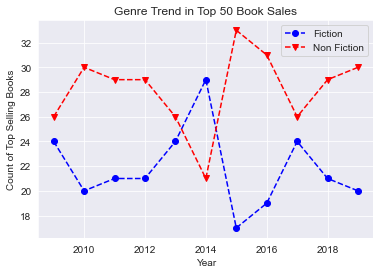

In [17]:
# Plot the word counts as line graphs
fig, ax = plt.subplots()
ax.plot(x_labels,annual_books['Fiction'], marker='o',
       color='b', linestyle='--', label='Fiction')
ax.plot(x_labels,annual_books['Non Fiction'], marker='v',
       color='r', linestyle='--', label='Non Fiction')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Top Selling Books')
ax.set_title('Genre Trend in Top 50 Book Sales')
ax.legend()
plt.show()

To Answer Q1: The graph for Genre Trend in Top 50 Book Sales shows that except for 2014, Non Fiction books were more prevelent in the Top 50 list.

#  Quetion 2: How does the quantity of review reflect the User Rating of a Top 50 books?

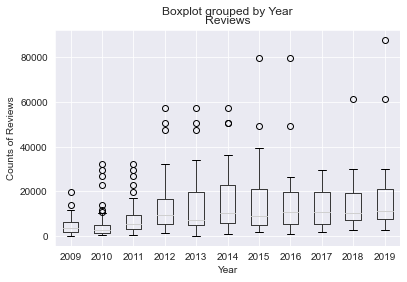

In [18]:
# Are there outliers in the User Rating or Reviews data?
fig, ax = plt.subplots()
books.boxplot(column=['Reviews'],by=['Year'], ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Counts of Reviews')
#ax.set_title('Box Plot of Review Counts')
plt.show()

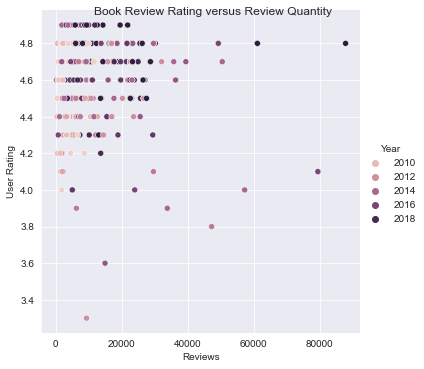

In [19]:
# Show a scatter plot of Ratings versus Review Quantity
g = sns.relplot(x='Reviews', y='User Rating',
               data=books, kind='scatter', hue='Year')
g.fig.suptitle("Book Review Rating versus Review Quantity")
plt.show()

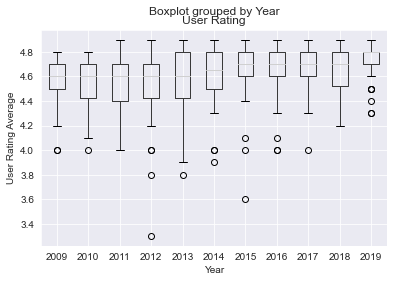

In [20]:
# Are there outliers or trends in the User Rating Values themselves?
fig, ax = plt.subplots()
books.boxplot(column=['User Rating'],by=['Year'], ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('User Rating Average')
plt.show()

To Answer Q2: The graph for User Ratings over the last few years has increased in value with 2019 having the highest average ratings.  Even the three outliers in 2019 are better values than the lower error bar of the prior three years.  The Ratings and Reviews demonstrates that the data is skewed toward high ratings and low review count for this data.  There are a few outliers that have extremely high review counts that show no correlation with User Ratings.

# Question 3: How does the book price impact its ratings?

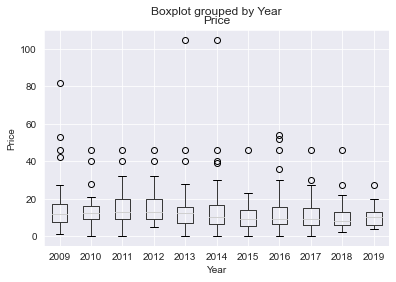

In [21]:
# Are there outliers in the Book Prices?
# There are high outliers
fig, ax = plt.subplots()
books.boxplot(column=['Price'],by=['Year'], ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

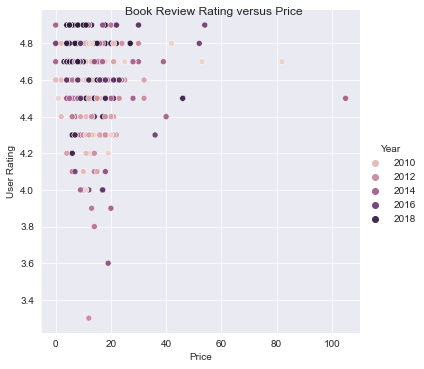

In [22]:
# Show a scatter plot of Ratings versus Review Quantity
g = sns.relplot(x='Price', y='User Rating',
               data=books, kind='scatter', hue='Year')
g.fig.suptitle("Book Review Rating versus Price")
plt.show()

To Answer Q3: The graph for Book Reviews versus Price show no true correlation.  
    However, there appears to be a correlation with higher scores in recent years

# Question 4: Does price impact the number of reviews given?

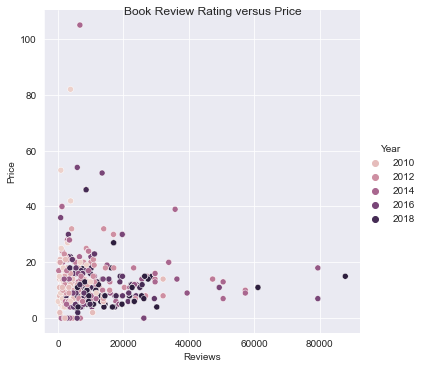

In [23]:
# Show a scatter plot of Ratings versus Review Quantity
g = sns.relplot(x='Reviews', y='Price',
               data=books, kind='scatter', hue='Year')
g.fig.suptitle("Book Review Rating versus Price")
plt.show()

To Answer Q4: The graph for Book Review Ratings versus Price do not indicate a correlation between price and review rating

# Question 5: How many authors had more than 1 book in Top 50 over the last few years?

Author Count:  [130, 60, 18, 12, 8, 20] 



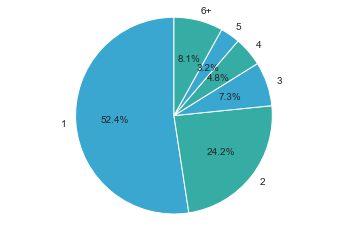

Authors with 10 or more books in Top 50: 
 Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Name: Author, dtype: int64 

Authors with 7to9 books in Top 50: 
 Dr. Seuss           9
Gallup              9
Rob Elliott         8
Eric Carle          7
Bill O'Reilly       7
Dav Pilkey          7
Stephenie Meyer     7
Stephen R. Covey    7
Name: Author, dtype: int64 

Authors with 5to6 books in Top 50: 
 Harper Lee           6
Don Miguel Ruiz      6
The College Board    6
Stieg Larsson        6
J.K. Rowling         6
E L James            6
Sarah Young          6
R. J. Palacio        5
John Green           5
Laura Hillenbrand    5
Roger Priddy         5
Dale Carnegie        5
Patrick Lencioni     5
Giles Andreae        5
John Grisham         5
Name: Author, dtype: int64


In [36]:
author_list = books['Author'].value_counts()
author_count = []
steps = ['1','2','3','4','5','6+']
for x in range(1,6):
    authors = author_list[author_list == x]
    author_count.append(len(authors))
authors = author_list[author_list >= 6]
author_count.append(len(authors))
print("Author Count: ",author_count,'\n')

fig, ax = plt.subplots()
ax.pie(author_count, labels=steps, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

author_10orOver_list = author_list[author_list >= 10]
print("Authors with 10 or more books in Top 50: \n",author_10orOver_list,"\n")
author_7to9_list=author_list[(author_list>=7) & (author_list<10)]
print("Authors with 7to9 books in Top 50: \n",author_7to9_list,"\n") 
author_5to6_list=author_list[(author_list>=5) & (author_list<7)]
print("Authors with 5to6 books in Top 50: \n",author_5to6_list) 


To Answer Q5: The graph for Author counts in the Top 50 shows that 130 authors had only 1 book in the Top 50, where 118 authors had more than 1 book in the Top 50 for last 11 years.  In fact, 20 authors had more than 5 books in the Top 50.

# Question 6: Which authors have appeared in the Top 50 list the most over the last few years?

In [55]:
def plot_bars(df,title,xlbl,ylbl):
    # Plot the author list as horizontal bar graph
    fig, ax = plt.subplots()
    ax = df.plot(kind='barh', figsize=(6, 12), color='#86bf91', zorder=2, width=0.8)

    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    ax.set_xlabel(xlbl, labelpad=20, weight='bold', size=16)
    ax.set_ylabel(ylbl, labelpad=20, weight='bold', size=16)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.title(title)
    plt.show()
    

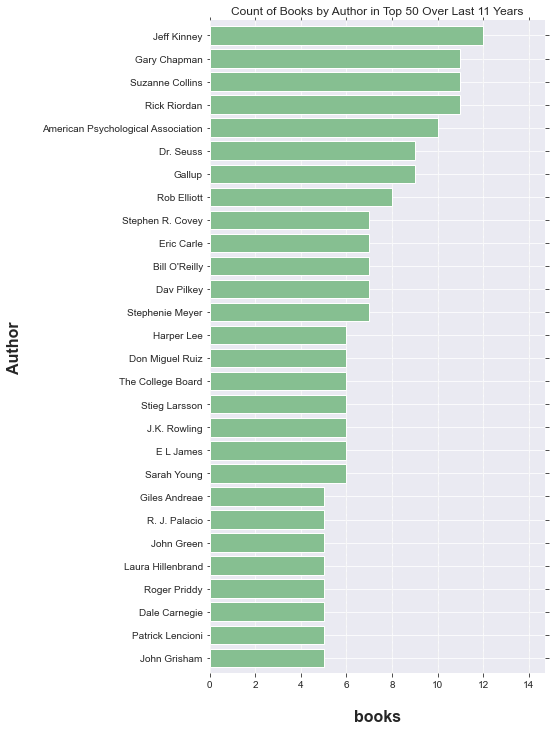

In [56]:
# show the top authors by frequency in Top 50
#author_list = books['Author'].value_counts()[0:28]
authors = books['Author'].value_counts()
author_5orMore_list = authors[authors >= 5]
author_5orMore_list = author_5orMore_list.sort_values()
plot_bars(author_5orMore_list,"Count of Books by Author in Top 50 Over Last 11 Years","books","Author")

To Answer Q5: The name of the top most found author in the Top 50 was shown (for 12 books).  There were two authors with 11 books, one with 10, and two with 9.   

#  7) Do authors have correlation with review count in the Top 50 list?

In [77]:
# show the top authors by review count in Top 50
author_reviews = books[['Author','Reviews']]
print(author_reviews)
author_reviews['Reviews'].describe()

                       Author  Reviews
0                    JJ Smith    17350
1                Stephen King     2052
2          Jordan B. Peterson    18979
3               George Orwell    21424
4    National Geographic Kids     7665
..                        ...      ...
545               Jeff Kinney     9413
546               Jen Sincero    14331
547               Jen Sincero    14331
548               Jen Sincero    14331
549               Jen Sincero    14331

[550 rows x 2 columns]


count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


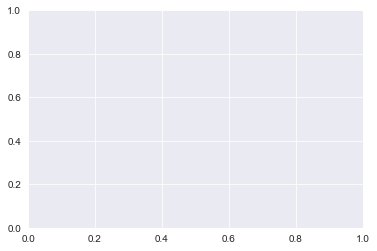

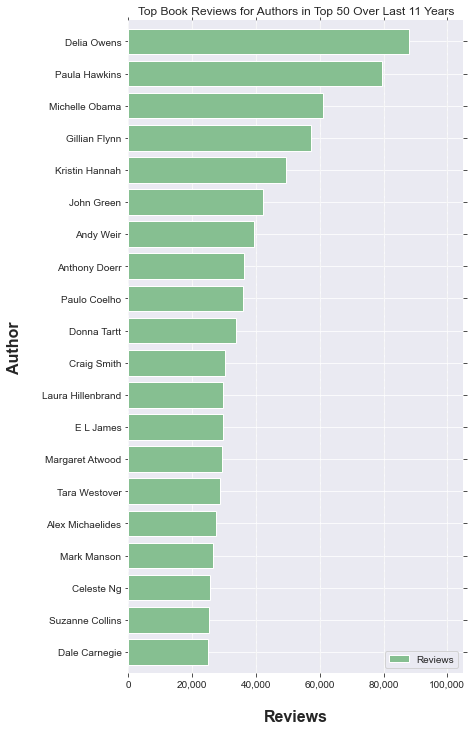

In [82]:
# Look at top authors by review count -above 25000 reviews for top authors
author_reviews = author_reviews.groupby('Author').mean()
top25_reviews = author_reviews[author_reviews['Reviews'] >= 25000]
top25_reviews.sort_values(by=['Reviews'],ascending=True, inplace=True)
plot_bars(top25_reviews,"Top Book Reviews for Authors in Top 50 Over Last 11 Years","Reviews","Author")

# 8) Do authors have correlation with price in the Top 50 list?

In [57]:
# show the top authors by frequency in Top 50
#author_list = books['Author'].value_counts()[0:28]
author_price = books[['Author','Price']]
print(author_price)
author_price['Price'].describe()

                       Author  Price
0                    JJ Smith      8
1                Stephen King     22
2          Jordan B. Peterson     15
3               George Orwell      6
4    National Geographic Kids     12
..                        ...    ...
545               Jeff Kinney      8
546               Jen Sincero      8
547               Jen Sincero      8
548               Jen Sincero      8
549               Jen Sincero      8

[550 rows x 2 columns]


count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


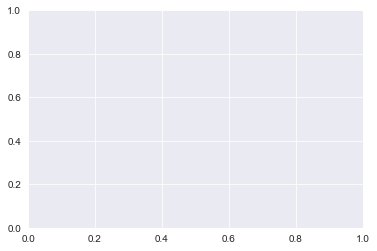

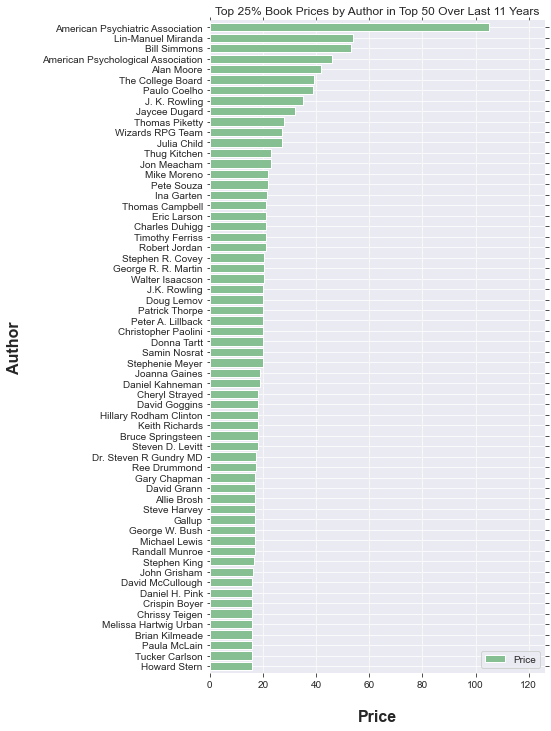

In [73]:
# Look at top 25% authors by price -above $16 per book
summed_authors = author_price.groupby('Author').mean()
top25_price = summed_authors[summed_authors['Price'] >= 16]
top25_price.sort_values(by=['Price'],ascending=True, inplace=True)
plot_bars(top25_price,"Top 25% Book Prices by Author in Top 50 Over Last 11 Years","Price","Author")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


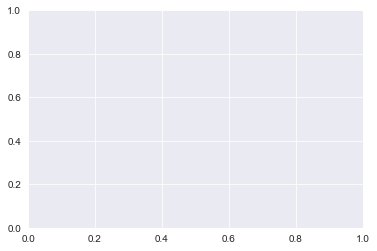

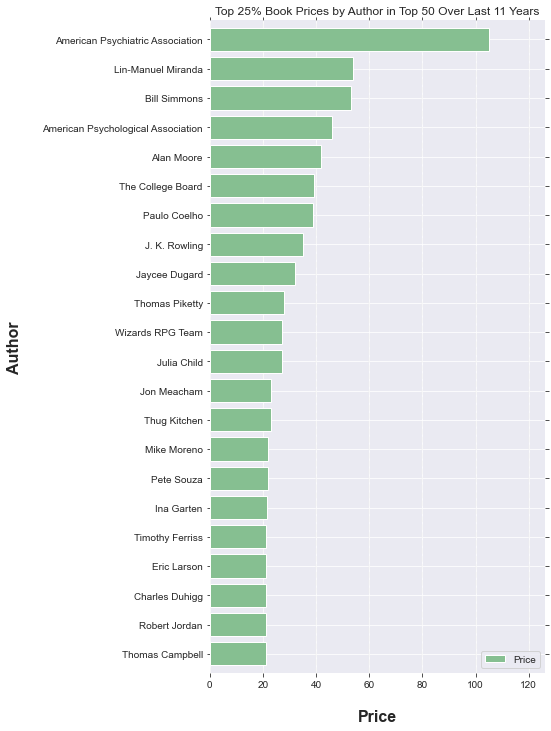

In [74]:
# The above graph indicates an interesting correlation only for those books above 21$
# Look at top authors by price -above $21 per book
summed_authors = author_price.groupby('Author').mean()
top25_price = summed_authors[summed_authors['Price'] >= 21]
top25_price.sort_values(by=['Price'],ascending=True, inplace=True)
plot_bars(top25_price,"Top 25% Book Prices by Author in Top 50 Over Last 11 Years","Price","Author")